#**NATURAL LANGUAGE PROCESSING FOR ADVANCING CLIMATE CHANGEASSESSMENT AND POLICY DECISION MAKING**

###*DIBYA PANDEY*
###*NAVEEN DONTHULA*
###*SNIGDHA CHIGURUPATI*

##*DATA 690 - NLP FOR PRACTIONERS*
##*PROF. ANTONIO DIANA*


###**Importing Required Libraries**

In [1]:
!pip install -q vaderSentiment

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import string
from spacy.lang.en import English
from heapq import nlargest
punctuations = string.punctuation
from spacy.language import Language
nlp = English()
nlp.add_pipe('sentencizer')
parser = English()
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from os import path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import plotly.express as px
from textblob import TextBlob
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import numpy as np
import networkx as nx
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from nltk.tokenize import sent_tokenize
import spacy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
nltk.download('vader_lexicon')
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


###READING TEXT FILE

In [3]:
with open('/content/sample_data/east_usa.txt', 'r') as file:
    text = file.read().replace('\n', '')

###**TEXT SUMMARIZATION**

In [4]:
 #definig sentence importances
def sentences_importance(text, normalised_dict):
    importance ={}
    for sentence in nlp(text).sents:
        for token in sentence:
            target_token = token.text.lower()
            if target_token in normalised_dict.keys():
                if sentence in importance.keys():
                    importance[sentence]+=normalised_dict[target_token]
                else:
                    importance[sentence]=normalised_dict[target_token]
    return importance

In [5]:
#Generating number vectors
def generate_numbers_vector(tokens):
    frequency = [tokens.count(token) for token in tokens]
    token_dict = dict(list(zip(tokens,frequency)))
    maximum_frequency=sorted(token_dict.values())[-1]
    normalised_dict = {token_key:token_dict[token_key]/maximum_frequency for token_key in token_dict.keys()}
    return normalised_dict

In [6]:
#Define the preprocess function
def pre_process(document):
    clean_tokens = [token.lemma_.lower().strip() for token in document]
    clean_tokens = [token for token in clean_tokens if token not in STOP_WORDS and token not in punctuations]
    tokens = [token.text for token in document]
    lower_case_tokens = list(map(str.lower, tokens))
    return " ".join(lower_case_tokens)

In [7]:
#defining to generate summary
def generate_summary(rank, text):
    target_document = parser(text)
    importance = sentences_importance(text, generate_numbers_vector(pre_process(target_document)))
    summary = nlargest(rank, importance, key=importance.get)
    return summary

In [8]:
# Save the summary
num_sentences_to_generate = 10
summary=(generate_summary(num_sentences_to_generate, text))

# Filename is complete path to file plus name and .txt extension
file = open('summary.txt', 'w')
file.write(str(summary))
file.close()

In [9]:
summary

[July's global average temperature of 16.95 degrees Celsius (62.51 degrees Fahrenheit) was a third of a degree Celsius (six tenths of a degree Fahrenheit) higher than the previous record set in 2019, Copernicus Climate Change Service, a division of the European Union's space program, announced Tuesday.,
 ”July’s global average temperature of 16.95 degrees Celsius was a third of a degree Celsius (six-tenths of a degree Fahrenheit) higher than the previous record set in 2019Now that July's sizzling numbers are all in, the European climate monitoring organization made it official: July 2023 was Earth's hottest month on record by a wide margin.,
 ”Around the globe, temperatures are soaring as the world enters a multiyear period of intense warming, fueled by man-made climate change and a naturally occurring El Niño weather pattern, which is releasing a gusher of heat into the atmosphere.,
 A ‘Dangerous Combination’: Trying to keep cool during a record-setting summer is a social divide for r

###**SENTIMENT ANALYSIS**

In [10]:
nlp = English()
nlp.add_pipe('sentencizer')
parser = English()
analyzer=SentimentIntensityAnalyzer()
summary_text = str(summary)
res=analyzer.polarity_scores(summary_text)
print(res)

{'neg': 0.027, 'neu': 0.882, 'pos': 0.09, 'compound': 0.9543}


In [11]:
# Finding the subjectivity
from textblob import TextBlob

blob = TextBlob(summary_text)

# Calculate subjectivity
subjectivity = blob.sentiment.subjectivity

# Print the subjectivity score
print("Subjectivity:", subjectivity)

# Interpret the subjectivity score
if subjectivity < 0.5:
    print("The text is more objective.")
else:
    print("The text is more subjective.")

Subjectivity: 0.3870967741935484
The text is more objective.


In [12]:
pos = res["pos"]
neu = res["neu"]
neg = res["neg"]
print(f'The percentage of positive sentiment is {round(pos*100,2)}%')
print(f'The percentage of neutral sentiment is {round(neu*100,2)}%')
print(f'The percentage of negative sentiment is {round(neg*100,2)}%')


The percentage of positive sentiment is 9.0%
The percentage of neutral sentiment is 88.2%
The percentage of negative sentiment is 2.7%


In [13]:
# get polarity scores
neg, pos, neu = [],[],[]
for i, val in res.items():
    #ss = sia.polarity_scores(str(mylist))
    neg.append(res['neg'])
    pos.append(res['pos'])
    neu.append(res['neu'])
res['neg'] = neg
res['pos'] = pos
res['neu'] = neu

In [14]:
fig = px.scatter_ternary(res, a="neu", b="pos", c="neg")
fig.show()


###**NAMED ENTITY RECOGNITION**

In [15]:
# Load the spaCy model for NER
nlp_model = "en_core_web_sm"
nlp = spacy.load(nlp_model)

In [16]:
# Read the content from the summaryl file
with open("summary.txt", "r") as file:
    document_content = file.read()



# # Preprocess the document content
# cleaned_file = pre_process(nlp(document_content))

# # Save the preprocessed content to a different file (e.g., "preprocessed_output.txt")
# with open("cleaned_file.txt", "w") as output_file:
#     output_file.write(cleaned_file)


In [17]:
# Function for Named Entity Recognition
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Perform Named Entity Recognition on the preprocessed content
extracted_entities = perform_ner(document_content)

# Print the extracted named entities and their labels
print("Named Entities:")
for entity, label in extracted_entities:
    print(f"{entity} - {label}")

Named Entities:
July - DATE
16.95 degrees - QUANTITY
62.51 degrees - QUANTITY
Fahrenheit - WORK_OF_ART
a third - CARDINAL
six tenths - DATE
Fahrenheit - GPE
2019 - DATE
Copernicus Climate Change Service - ORG
the European Union's - ORG
Tuesday - DATE
July - DATE
16.95 degrees - QUANTITY
a third - CARDINAL
six-tenths - CARDINAL
Fahrenheit - GPE
2019Now - CARDINAL
July - DATE
European - NORP
July 2023 - DATE
Earth - LOC
a multiyear - DATE
El Niño - ORG
A ‘Dangerous Combination - WORK_OF_ART
Texas - GPE
just last week - DATE
Mexico - GPE
one - CARDINAL
Hermosillo - PERSON
120-degree - QUANTITY
about July - DATE
Imperial College of London - ORG
Friederike Otto - PERSON
month - DATE
Earth - LOC
ten thousand years - DATE
Stefan Rahmstorf - PERSON
the Potsdam Institute for Climate Research - ORG
Germany - GPE
The Far-Reaching Effects of Extreme HeatOn the Trail: - ORG
a summer - DATE
Grand Canyon National Park - FAC
Europe - LOC
1 - CARDINAL
10 - CARDINAL
each year - DATE


###**TOPIC MODELING**

In [18]:
#loading summary file
with open("summary.txt", "r") as file:
    data = file.read()

# Tokenize the data into sentences (or other appropriate document units)
documents = sent_tokenize(str(data))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# convert the text to a tf-idf weighted term-document matrix
vectorizer = TfidfVectorizer(max_features=2000, min_df=1, stop_words='english')
X = vectorizer.fit_transform(documents)
idx_to_word = np.array(vectorizer.get_feature_names_out())

# apply NMF
nmf = NMF(n_components=5, solver="cd")
W = nmf.fit_transform(X)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-20:]]])))


Topic 1: naturally,service,global,16,tenths,change,previous,set,higher,95,temperature,average,european,climate,degrees,fahrenheit,celsius,record,july,degree
Topic 2: latino,mexico,care,income,period,space,releasing,tenths,month,earth,16,weather,union,global,pattern,colleagues,london,2019,wide,hottest
Topic 3: blow,thousand,approach,10,trail,institute,far,effects,hikers,europe,years,southern,rangers,stefan,park,chance,quite,climate,heat,said
Topic 4: institute,need,approach,messaging,heat,said,10,thousand,year,warmest,research,community,extreme,prevent,trails,makes,volunteer,ice,stunning,potsdam
Topic 5: rahmstorf,grand,reaching,event,use,disaster,deadly,research,messaging,aggressive,heat,similar,walking,dryer,pioneering,people,germany,feels,distributes,climate


In [19]:
def display_topics(model, features, no_top_words=20):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # Invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            word = features[largest[i]]
            weight = abs(words[largest[i]] * 100.0 / total)
            print("  %s (%2.2f)" % (word, weight))

In [20]:
# Call the display_topics function to show the topics
display_topics(nmf, idx_to_word)


Topic 00
  degree (4.90)
  july (4.70)
  record (4.40)
  celsius (3.96)
  fahrenheit (3.05)
  degrees (2.53)
  climate (2.37)
  european (2.05)
  average (2.04)
  temperature (1.98)
  95 (1.77)
  higher (1.68)
  set (1.68)
  previous (1.67)
  change (1.54)
  tenths (1.38)
  16 (1.34)
  global (1.31)
  service (1.03)
  naturally (1.03)

Topic 01
  hottest (3.37)
  wide (2.68)
  2019 (2.46)
  london (2.41)
  colleagues (2.36)
  pattern (2.03)
  global (1.98)
  union (1.96)
  weather (1.94)
  16 (1.90)
  earth (1.80)
  month (1.80)
  tenths (1.79)
  releasing (1.73)
  space (1.71)
  period (1.67)
  income (1.66)
  care (1.64)
  mexico (1.58)
  latino (1.58)

Topic 02
  said (2.75)
  heat (2.56)
  climate (2.43)
  quite (2.05)
  chance (1.95)
  park (1.91)
  stefan (1.90)
  rangers (1.88)
  southern (1.86)
  years (1.86)
  europe (1.85)
  hikers (1.84)
  effects (1.82)
  far (1.81)
  institute (1.80)
  trail (1.80)
  10 (1.79)
  approach (1.78)
  thousand (1.77)
  blow (1.76)

Topic 03
  

###**WORD FREQUENCY ANALYSIS**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word Frequency: Counter({'record': 6, 'Celsius': 4, 'degree': 4, 'climate': 4, 'Julys': 3, 'degrees': 3, 'Fahrenheit': 3, 'heat': 3, 'global': 2, 'average': 2, 'temperature': 2, '1695': 2, 'third': 2, 'higher': 2, 'previous': 2, 'set': 2, 'Climate': 2, 'European': 2, 'July': 2, 'hottest': 2, 'month': 2, 'summer': 2, 'water': 2, 'scientist': 2, '6251': 1, 'six': 1, 'tenths': 1, '2019': 1, 'Copernicus': 1, 'Change': 1, 'Service': 1, 'division': 1, 'Unions': 1, 'space': 1, 'program': 1, 'announced': 1, 'Tuesday': 1, 'sixtenths': 1, '2019Now': 1, 'sizzling': 1, 'numbers': 1, 'in': 1, 'monitoring': 1, 'organization': 1, 'official': 1, '2023': 1, 'Earths': 1, 'wide': 1, 'margin': 1, 'Around': 1, 'globe': 1, 'temperatures': 1, 'soaring': 1, 'world': 1, 'enters': 1, 'multiyear': 1, 'period': 1, 'intense': 1, 'warming': 1, 'fueled': 1, 'manmade': 1, 'change': 1, 'naturally': 1, 'occurring': 1, 'El': 1, 'Niño': 1, 'weather': 1, 'pattern': 1, 'releasing': 1, 'gusher': 1, 'atmosphere': 1, 'Dangero

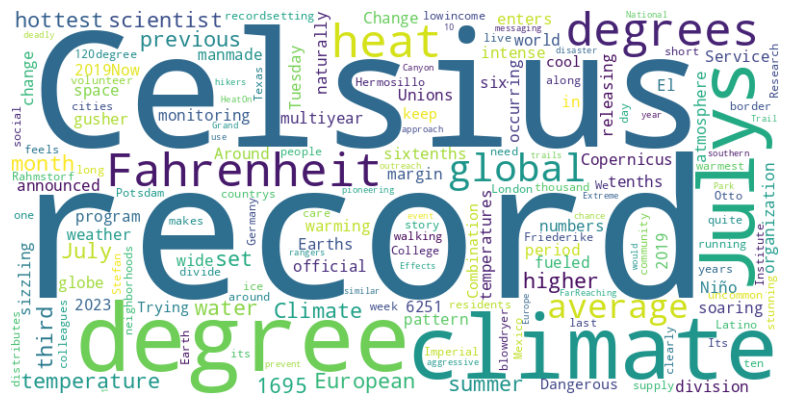

In [38]:
# Download the stopwords resource
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Get a list of stopwords
stop_words = set(stopwords.words("english"))
additional_stop_words = [ 'said','like','6251','made']
stop_words.update(additional_stop_words)



# Read the content from the "summary.txt" file
with open("summary.txt", "r") as file:
    summary = file.read()

# Tokenize the summary
word_tokens = summary.split()

# Remove non-alphanumeric characters and filter out stopwords
filtered_words = [re.sub(r'\W+', '', word) for word in word_tokens if word.lower() not in stop_words and re.sub(r'\W+', '', word) != '']

# Calculate word frequencies
word_freq = Counter(filtered_words)

# Print word frequencies
print("Word Frequency:", word_freq)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


###**WORD EMBEDDINGS**

In [22]:
stop_words = set(stopwords.words("english"))
# Define your list of additional stop words
additional_stop_words = ['team','single','via','miss','']
stop_words.update(additional_stop_words)

# Read the content from the original file (e.g., "summary.txt")
with open("summary.txt", "r") as file:
    summary = file.read()

#Preprocess the summary and tokenize it
tokenized_summary = simple_preprocess(summary)
processed_summary = [word for word in tokenized_summary if word not in stop_words]

# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[processed_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in tokenized_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create a DataFrame to hold the 2D coordinates and word labels
df = pd.DataFrame(word_vectors_2d, columns=['Dimension 1', 'Dimension 2'])
df['Word'] = list(word_embeddings.keys())

# Create the scatter plot using Plotly
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', text='Word', title='Word Embeddings Scatter Plot')

# Customize the layout
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

In [23]:
# Create an empty figure
fig = go.Figure()

# Define colors
colors = px.colors.qualitative.Plotly

# Loop through each word embedding and add a scatter trace for it
for i, word in enumerate(df['Word']):
    fig.add_trace(go.Scatter(x=[df['Dimension 1'][i]], y=[df['Dimension 2'][i]],
                             mode='markers',
                             name=word,  # Legend label
                             marker_color=colors[i % len(colors)])) # Use different colors

# Customize the layout
fig.update_layout(title='Word Embeddings Scatter Plot',
                  xaxis_title='Dimension 1',
                  yaxis_title='Dimension 2',
                  legend_title='Words',
                  legend=dict(orientation="v",  # Vertical orientation
                              yanchor="top",
                              y=1.02,
                              xanchor="left",
                              x=1)  # Position outside the plot
                  )

# Show the plot
fig.show()


<ipython-input-24-5212e1767525>:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



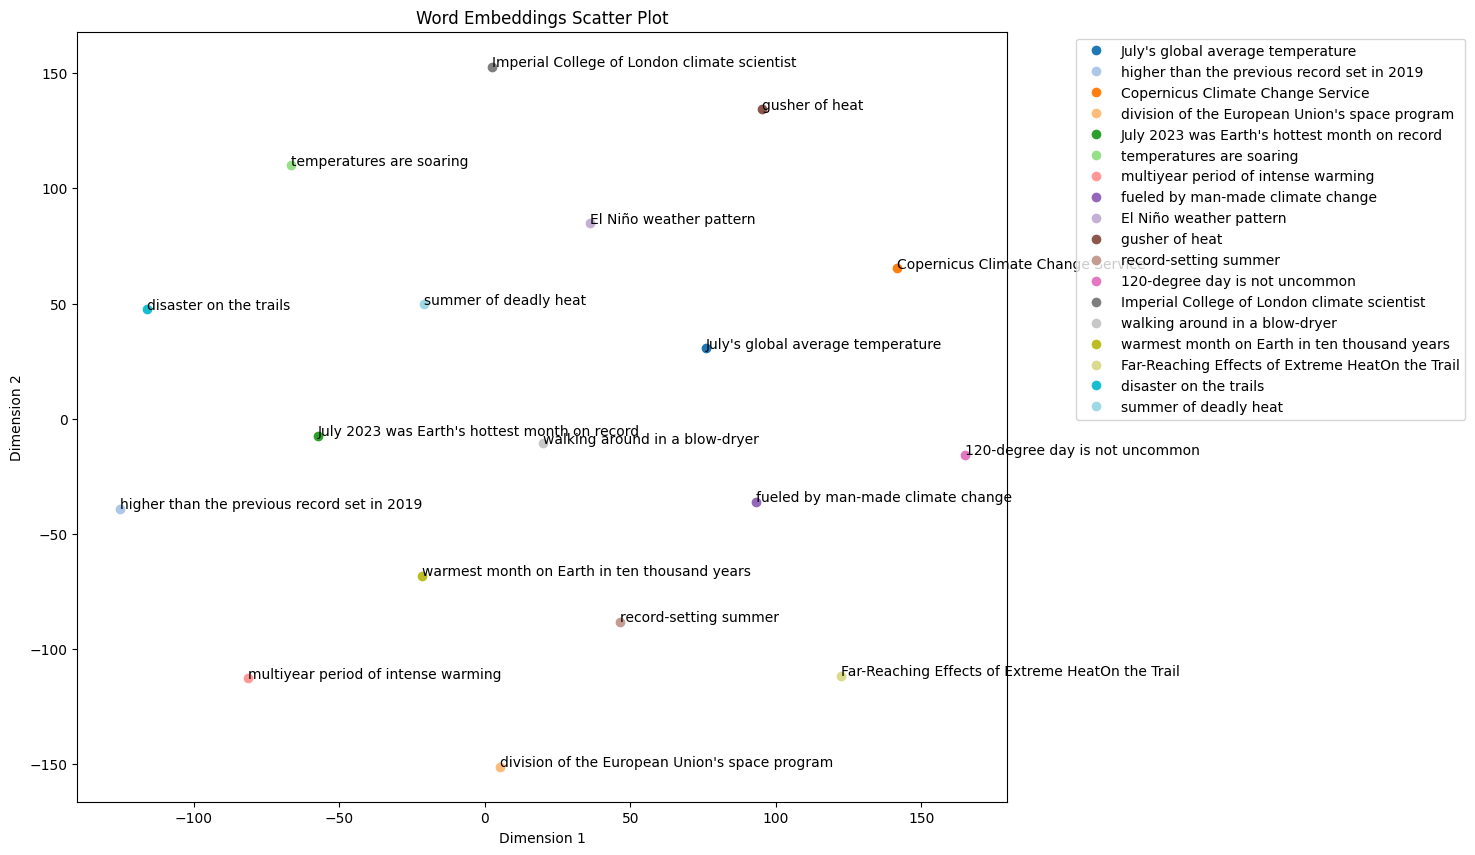

In [24]:
keywords_summary = [
    "July's global average temperature",'higher than the previous record set in 2019','Copernicus Climate Change Service',"division of the European Union's space program","July 2023 was Earth's hottest month on record",
    'temperatures are soaring','multiyear period of intense warming','fueled by man-made climate change','El Niño weather pattern','gusher of heat','record-setting summer','120-degree day is not uncommon','Imperial College of London climate scientist',
    'walking around in a blow-dryer','warmest month on Earth in ten thousand years','Far-Reaching Effects of Extreme HeatOn the Trail','disaster on the trails','summer of deadly heat'
]

# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[keywords_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in keywords_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create the scatter plot
plt.figure(figsize=(12, 10))

# Loop through each unique word and plot it with a different color
colors = plt.cm.get_cmap('tab20', len(word_embeddings.keys()))
for i, (word, color) in enumerate(zip(word_embeddings.keys(), colors.colors)):
  plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color=color)
  plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Scatter Plot')

# Create a legend with labels and corresponding colors
labels = word_embeddings.keys()
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip(labels, colors.colors)]
plt.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()


###**KNOWLEDGE GRAPH**

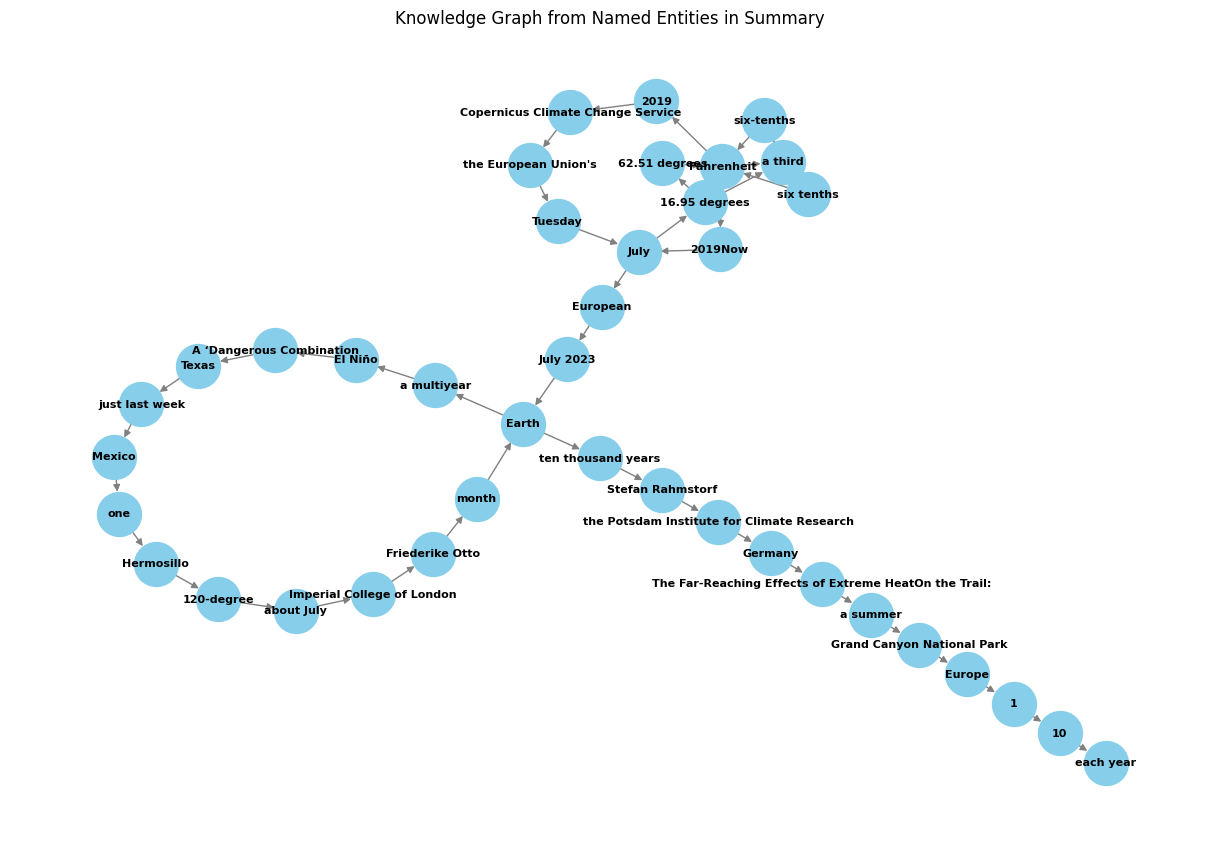

In [25]:
# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Process the summary with spaCy
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities
for ent in entities:
    G.add_node(ent.text, type=ent.label_)

# Connect named entities in the order they appear
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    G.add_edge(prev_ent.text, next_ent.text)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


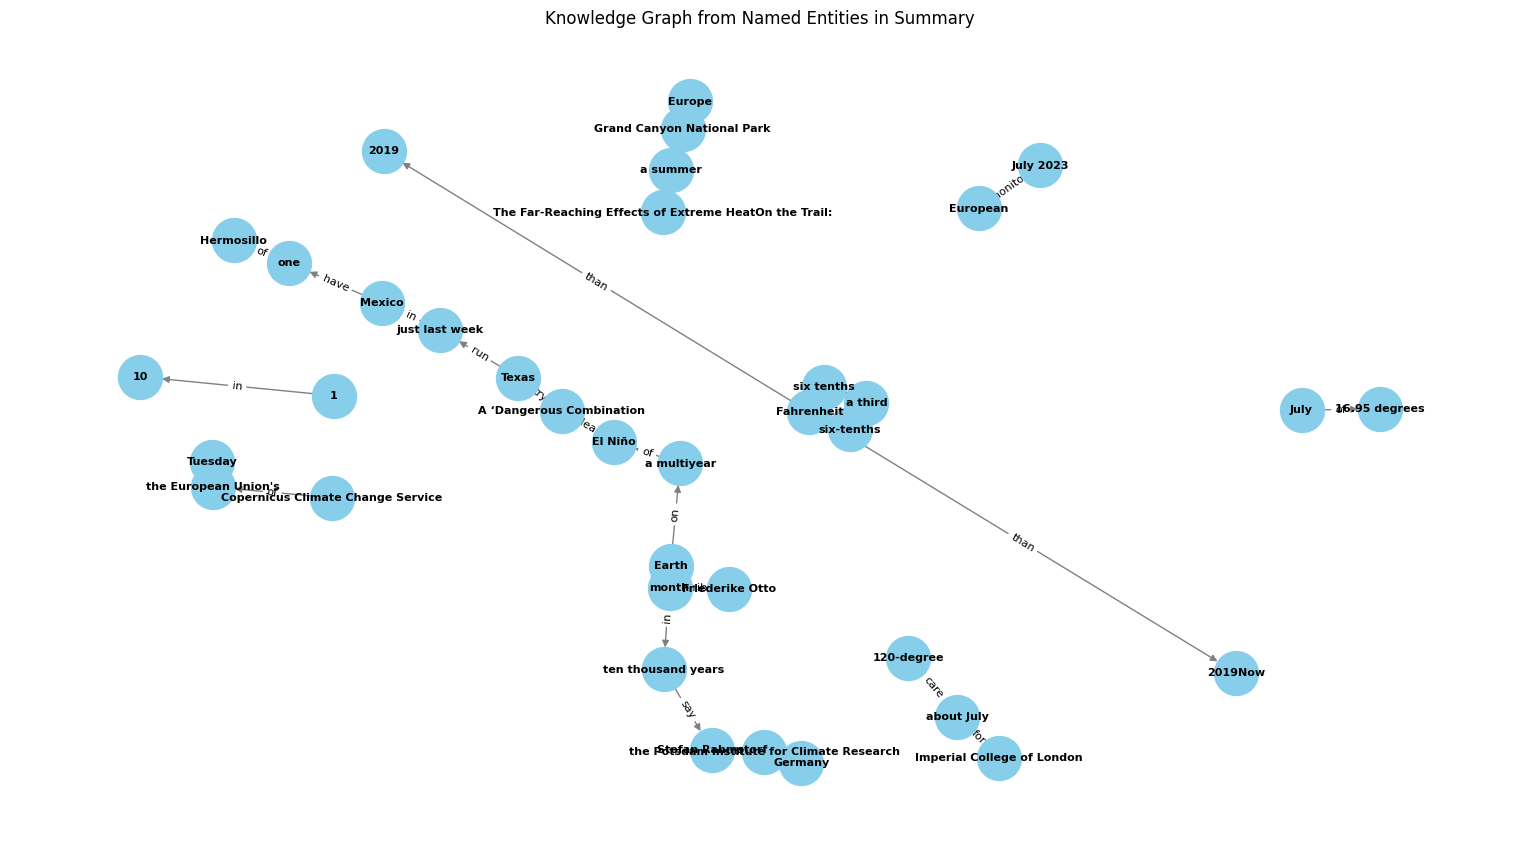

In [26]:
def find_relationship(start_ent, end_ent):
    # Check if start_ent comes before end_ent
    if start_ent.start < end_ent.start:
        tokens_between = [t for t in doc[start_ent.end:end_ent.start]]
    else:
        tokens_between = [t for t in doc[end_ent.end:start_ent.start]]

    # Find the first verb or preposition token between the entities
    for token in tokens_between:
        if token.pos_ in ('VERB', 'ADP'):
            return token.lemma_
    return None

# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")
# Assuming `summary` contains the text of your summary
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities and edges with labels
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    relationship = find_relationship(prev_ent, next_ent)
    if relationship:
        G.add_edge(prev_ent.text, next_ent.text, label=relationship)

# Draw the graph with edge labels
plt.figure(figsize=(15, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['label'] for u, v in G.edges()}, font_size=8)
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


###**DENDOGRAMS**

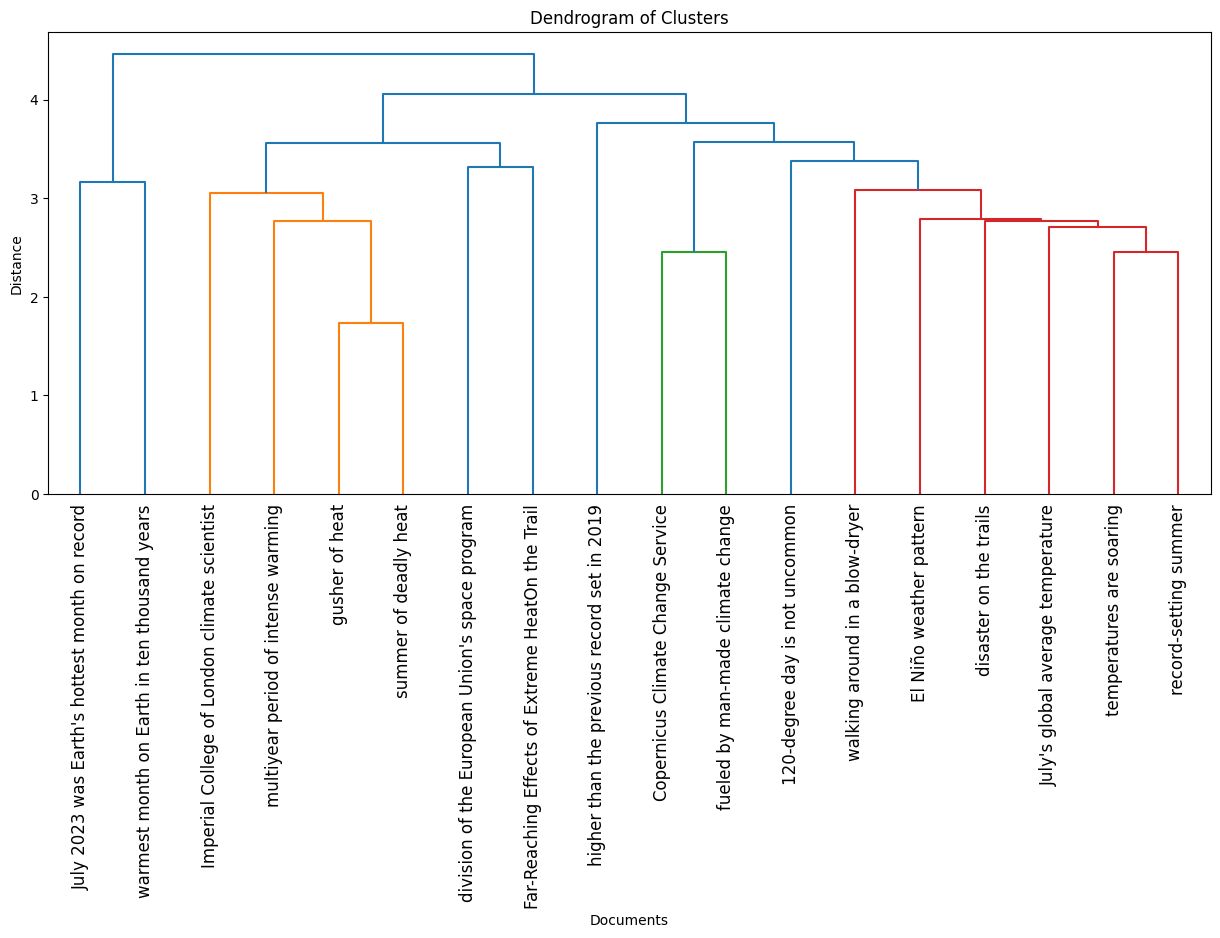

In [27]:
# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(keywords_summary)

# Perform Agglomerative Clustering
n_clusters = 3  # You can adjust the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(X.toarray())

# Create and plot the dendrogram
plt.figure(figsize=(15, 6))
linkage_matrix = linkage(X.toarray(), method='ward')
dendrogram(linkage_matrix, labels=keywords_summary, orientation='top')
plt.title("Dendrogram of Clusters")
plt.ylabel("Distance")
plt.xlabel("Documents")
plt.xticks(rotation=90)
plt.show()


###**Cosine Similarity**

In [30]:
data1 = open('/content/sample_data/west_usa.txt')
text1 = data1.read().replace('\n', '').replace('-', ',')
data2 = open('/content/sample_data/east_usa.txt')
text2 = data2.read().replace('\n', '').replace('-', ',')
data3 = open('/content/sample_data/central_usa.txt')
text3 = data3.read().replace('\n', '').replace('-', ',')

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text_file_m, text_file_n):
    tfidf = vectorizer.fit_transform((text_file_m, text_file_n))
    return ((tfidf * tfidf.T).A)[0, 1]

print(cosine_sim(text1,text2))
print(cosine_sim(text2,text3))
print(cosine_sim(text1,text3))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'th

0.7984706278521869
0.5370735639592626
0.5073597921336895


###**PREDICTIVE ANALYTICS**

In [31]:
num_sentences_to_generate = 100
summary_pa=(generate_summary(num_sentences_to_generate, text))
summary_pa

[July's global average temperature of 16.95 degrees Celsius (62.51 degrees Fahrenheit) was a third of a degree Celsius (six tenths of a degree Fahrenheit) higher than the previous record set in 2019, Copernicus Climate Change Service, a division of the European Union's space program, announced Tuesday.,
 ”July’s global average temperature of 16.95 degrees Celsius was a third of a degree Celsius (six-tenths of a degree Fahrenheit) higher than the previous record set in 2019Now that July's sizzling numbers are all in, the European climate monitoring organization made it official: July 2023 was Earth's hottest month on record by a wide margin.,
 the globe, temperatures are soaring as the world enters a multiyear period of intense warming, fueled by man-made climate change and a naturally occurring El Niño weather pattern, which is releasing a gusher of heat into the atmosphere.,
 A ‘Dangerous Combination’: Trying to keep cool during a record-setting summer is a social divide for residents

In [32]:
# Saving the generated summary to a file
with open("predictive_analysis.txt", 'w') as file:
    file.write(str(summary_pa))

In [33]:
nltk.download('vader_lexicon')

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Read the summary from a file
with open("predictive_analysis.txt", 'r') as file:
    summary_pa = file.read()

# Remove brackets and extra commas
summary_pa = summary_pa.replace('[', '').replace(']', '')

# Process the text with spaCy
doc = nlp(summary_pa)

sia = SentimentIntensityAnalyzer()

data = []
for sent in doc.sents:
    sentence = sent.text.strip()  # Remove leading and trailing whitespace
    if sentence.startswith(','):
        sentence = sentence[1:].strip()

    # Skip adding the row if the sentence is empty
    if sentence == '':
        continue

    sentiment_score = sia.polarity_scores(sentence)
    compound_score = sentiment_score['compound']

    # Classify sentiment as positive, neutral, or negative
    if compound_score >= 0.3:
        sentiment_label = "positive"
    elif compound_score < 0:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"

    data.append((sentence, compound_score, sentiment_label))

df = pd.DataFrame(data, columns=['sentence', 'compound_score', 'sentiment_label'])
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,sentence,compound_score,sentiment_label
0,Julys global average temperature of 1695 degre...,0.0000,neutral
1,the globe temperatures are soaring as the worl...,0.4939,positive
2,And just last week my colleagues in Mexico had...,0.3612,positive
3,A community volunteer who distributes water an...,-0.0165,negative
4,In southern Europe there would be a 1 in 10 ch...,0.2500,neutral
5,In a summer of deadly heat for hikers rangers ...,-0.1280,negative
6,Normally global temperature records are broken...,-0.4767,negative
7,I like to be warm said Ellie Cooper a therapis...,0.3612,positive
8,In China theres a 1 in 5 chance each year of a...,0.2500,neutral
9,Last week I got an email that I was dreading T...,0.0000,neutral


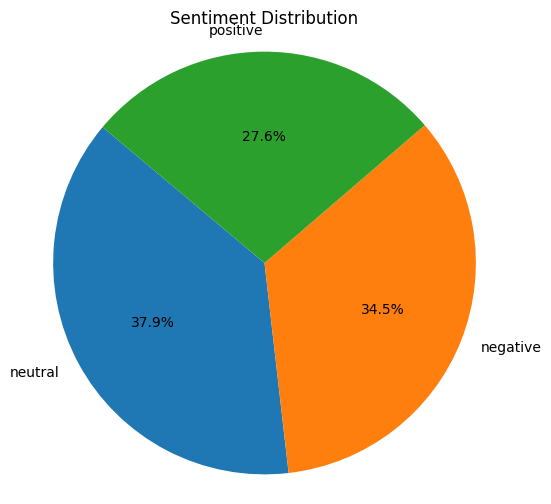

In [34]:
# Count the number of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = df[['compound_score']]
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:

clf1 = make_pipeline(StandardScaler(), LogisticRegression())
clf2 = RandomForestClassifier(random_state=42)
clf3 = make_pipeline(StandardScaler(), SVC(probability=True))  # Enable probability estimates

meta_clf = LogisticRegression()
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                                  meta_classifier=meta_clf,
                                  use_probas=True,
                                  average_probas=False)

stacking_clf.fit(X_train, y_train)

StackingClassifier(classifiers=[Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression())]),
                                RandomForestClassifier(random_state=42),
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(probability=True))])],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [37]:
# Make predictions on the test data
y_pred = stacking_clf.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9166666666666666
Precision: 0.9375
Recall: 0.9166666666666666
F1 Score: 0.9188311688311689
